In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

df = pd.read_excel("Forbes Athlete List 2012-2019.xlsx",)
df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,$127 M,$92 M,$35 M,Soccer,2019
1,#2,Cristiano Ronaldo,$109 M,$65 M,$44 M,Soccer,2019
2,#3,Neymar,$105 M,$75 M,$30 M,Soccer,2019
3,#4,Canelo Alvarez,$94 M,$92 M,$2 M,Boxing,2019
4,#5,Roger Federer,$93.4 M,$7.4 M,$86 M,Tennis,2019


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 7 columns):
Rank               795 non-null object
Name               795 non-null object
Pay                795 non-null object
Salary/Winnings    795 non-null object
Endorsements       795 non-null object
Sport              795 non-null object
Year               795 non-null int64
dtypes: int64(1), object(6)
memory usage: 43.6+ KB


In [3]:
df.Rank = df.Rank.apply(lambda x: int(x.split("#")[1]) if type(x) == np.str else x)
df.Pay = df.Pay.apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df.Endorsements = df.Endorsements.apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df["Salary/Winnings"].replace("-",'$nan M',inplace=True)
df["Salary/Winnings"] = df["Salary/Winnings"].apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df.Sport.replace({"Soccer":"Football",
                  "Football":"American Football",
                 "Mixed Martial Arts":"MMA",
                 "Auto racing":"Racing",
                  "Auto Racing":"Racing",
                  "Basketbal":"Basketball",
                 },inplace=True)

df.columns = ['Rank', 'Name', 'Pay', 'Salary_Winnings', 'Endorsements', 'Sport', 'Year']
df.head(10)

,Rank,Name,Pay,Salary_Winnings,Endorsements,Sport,Year
0,1,Lionel Messi,127.0,92.0,35.0,American Football,2019
1,2,Cristiano Ronaldo,109.0,65.0,44.0,American Football,2019
2,3,Neymar,105.0,75.0,30.0,American Football,2019
3,4,Canelo Alvarez,94.0,92.0,2.0,Boxing,2019
4,5,Roger Federer,93.4,7.4,86.0,Tennis,2019
5,6,Russell Wilson,89.5,80.5,9.0,American Football,2019
6,7,Aaron Rodgers,89.3,80.3,9.0,American Football,2019
7,8,LeBron James,89.0,36.0,53.0,Basketball,2019
8,9,Stephen Curry,79.8,37.8,42.0,Basketball,2019
9,10,Kevin Durant,65.4,30.4,35.0,Basketball,2019


In [4]:
messi = df[df.Name == "Lionel Messi"].sort_values("Year")
messi

,Rank,Name,Pay,Salary_Winnings,Endorsements,Sport,Year
705,11,Lionel Messi,39.0,20.0,19.0,American Football,2012
604,10,Lionel Messi,41.3,20.3,21.0,American Football,2013
543,4,Lionel Messi,64.7,41.7,23.0,American Football,2014
433,4,Lionel Messi,81.4,53.4,28.0,American Football,2015
321,2,Lionel Messi,81.4,53.4,28.0,American Football,2016
212,3,Lionel Messi,80.0,53.0,27.0,American Football,2017
101,2,Lionel Messi,111.0,84.0,27.0,American Football,2018
0,1,Lionel Messi,127.0,92.0,35.0,American Football,2019


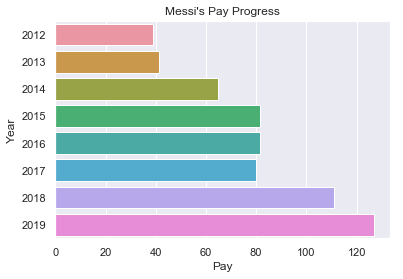

In [5]:
sns.barplot(data=messi,x="Pay",y="Year",orient="h")
plt.title("Messi's Pay Progress")
plt.show()

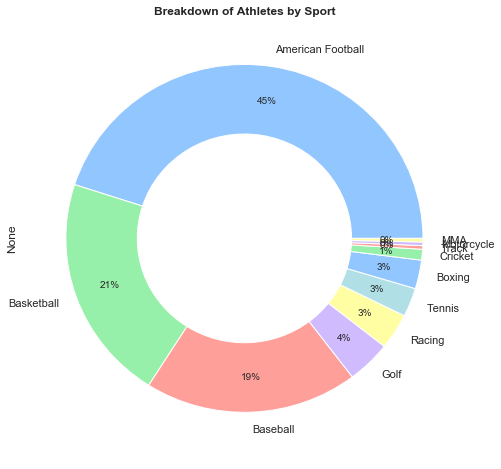

In [6]:
df.groupby("Name").first()["Sport"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(8,8),wedgeprops=dict(width=0.4),pctdistance=0.8)
plt.ylabel(None)
plt.title("Breakdown of Athletes by Sport",fontweight="bold")
plt.show()

In [7]:
df.Year = pd.to_datetime(df.Year,format="%Y")
df.dtypes

Rank                        int64
Name                       object
Pay                       float64
Salary_Winnings           float64
Endorsements              float64
Sport                      object
Year               datetime64[ns]
dtype: object

In [8]:
racing_bar_data = df.pivot_table(values="Pay",index="Year",columns="Name")
racing_bar_data.cumsum()

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,21.5,NaN,17.4,33.0,...,NaN,NaN,24.3,28.0,19.1,NaN,NaN,NaN,NaN,NaN
2013-01-01,16.6,NaN,NaN,49.0,NaN,21.2,NaN,NaN,NaN,63.3,...,NaN,NaN,45.4,52.0,39.8,NaN,17.0,NaN,21.7,19.7
2014-01-01,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.8,80.0,61.5,NaN,35.8,NaN,NaN,60.1
2015-01-01,NaN,NaN,NaN,90.1,19.8,42.7,NaN,NaN,43.3,NaN,...,NaN,NaN,95.7,101.5,81.5,NaN,NaN,23.7,NaN,99.2
2016-01-01,NaN,33.3,NaN,NaN,NaN,64.1,NaN,NaN,69.6,84.4,...,NaN,NaN,121.8,NaN,NaN,23.8,NaN,48.4,NaN,136.6
2017-01-01,NaN,NaN,NaN,NaN,NaN,85.8,NaN,28.1,96.9,NaN,...,22.0,28.1,145.4,123.0,NaN,NaN,NaN,72.5,NaN,168.6
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.9,127.2,NaN,...,46.0,63.2,172.4,NaN,NaN,49.0,NaN,96.7,NaN,NaN
2019-01-01,NaN,NaN,41.4,179.4,NaN,NaN,NaN,89.9,155.2,NaN,...,71.0,NaN,NaN,NaN,NaN,78.4,NaN,NaN,NaN,NaN


In [9]:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index(['Carmelo Anthony', 'Cristiano Ronaldo', 'Dwight Howard',
       'Justin Verlander', 'LeBron James', 'Lionel Messi', 'Phil Mickelson',
       'Rafael Nadal', 'Roger Federer', 'Tiger Woods'],
      dtype='object', name='Name')

In [10]:
racing_bar_filled = racing_bar_data.interpolate(method="linear").fillna(method="bfill")
racing_bar_filled

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,16.6,33.3,41.4,49.00,19.8,21.20,21.5,28.1,17.400000,33.000000,...,22.0,28.1,24.3,28.0,19.1,23.8,17.0,23.7,21.7,19.7
2013-01-01,16.6,33.3,41.4,49.00,19.8,21.20,21.5,28.1,20.233333,30.300000,...,22.0,28.1,21.1,24.0,20.7,23.8,17.0,23.7,21.7,19.7
2014-01-01,16.6,33.3,41.4,22.00,19.8,21.35,21.5,28.1,23.066667,27.233333,...,22.0,28.1,23.4,28.0,21.7,23.8,18.8,23.7,21.7,40.4
2015-01-01,16.6,33.3,41.4,19.10,19.8,21.50,21.5,28.1,25.900000,24.166667,...,22.0,28.1,26.9,21.5,20.0,23.8,18.8,23.7,21.7,39.1
2016-01-01,16.6,33.3,41.4,36.65,19.8,21.40,21.5,28.1,26.300000,21.100000,...,22.0,28.1,26.1,21.5,20.0,23.8,18.8,24.7,21.7,37.4
2017-01-01,16.6,33.3,41.4,54.20,19.8,21.70,21.5,28.1,27.300000,21.100000,...,22.0,28.1,23.6,21.5,20.0,24.5,18.8,24.1,21.7,32.0
2018-01-01,16.6,33.3,41.4,71.75,19.8,21.70,21.5,29.8,30.300000,21.100000,...,24.0,35.1,27.0,21.5,20.0,25.2,18.8,24.2,21.7,32.0
2019-01-01,16.6,33.3,41.4,89.30,19.8,21.70,21.5,32.0,28.000000,21.100000,...,25.0,35.1,27.0,21.5,20.0,29.4,18.8,24.2,21.7,32.0


In [11]:
racing_bar_filled = racing_bar_filled.cumsum()
racing_bar_filled

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,16.6,33.3,41.4,49.00,19.8,21.20,21.5,28.1,17.400000,33.000000,...,22.0,28.1,24.3,28.0,19.1,23.8,17.0,23.7,21.7,19.7
2013-01-01,33.2,66.6,82.8,98.00,39.6,42.40,43.0,56.2,37.633333,63.300000,...,44.0,56.2,45.4,52.0,39.8,47.6,34.0,47.4,43.4,39.4
2014-01-01,49.8,99.9,124.2,120.00,59.4,63.75,64.5,84.3,60.700000,90.533333,...,66.0,84.3,68.8,80.0,61.5,71.4,52.8,71.1,65.1,79.8
2015-01-01,66.4,133.2,165.6,139.10,79.2,85.25,86.0,112.4,86.600000,114.700000,...,88.0,112.4,95.7,101.5,81.5,95.2,71.6,94.8,86.8,118.9
2016-01-01,83.0,166.5,207.0,175.75,99.0,106.65,107.5,140.5,112.900000,135.800000,...,110.0,140.5,121.8,123.0,101.5,119.0,90.4,119.5,108.5,156.3
2017-01-01,99.6,199.8,248.4,229.95,118.8,128.35,129.0,168.6,140.200000,156.900000,...,132.0,168.6,145.4,144.5,121.5,143.5,109.2,143.6,130.2,188.3
2018-01-01,116.2,233.1,289.8,301.70,138.6,150.05,150.5,198.4,170.500000,178.000000,...,156.0,203.7,172.4,166.0,141.5,168.7,128.0,167.8,151.9,220.3
2019-01-01,132.8,266.4,331.2,391.00,158.4,171.75,172.0,230.4,198.500000,199.100000,...,181.0,238.8,199.4,187.5,161.5,198.1,146.8,192.0,173.6,252.3


In [12]:
racing_bar_filled = racing_bar_filled.resample("1D").interpolate(method="linear")[::7]

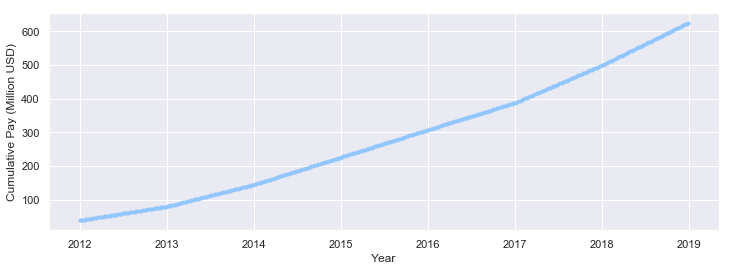

In [13]:
racing_bar_filled["Lionel Messi"].plot(marker=".",figsize=(12,4))
plt.ylabel("Cumulative Pay (Million USD)")
plt.show()

In [19]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

selected  = racing_bar_filled.iloc[-1,:].sort_values(ascending=False)[:20].index
data = racing_bar_filled[selected].round()

fig,ax = plt.subplots(figsize=(9.3,7))
fig.subplots_adjust(left=0.18)
no_of_frames = data.shape[0] #Number of frames

#initiate the barplot with the first rows of the dataframe
bars = sns.barplot(y=data.columns,x=data.iloc[0,:],orient="h",ax=ax)
ax.set_xlim(0,1500)
txts = [ax.text(0,i,0,va="center") for i in range(data.shape[1])]
title_txt = ax.text(650,-1,"Date: ",fontsize=12)
ax.set_xlabel("Pay (Millions USD)")
ax.set_ylabel(None)

def animate(i):
#     print(f"i={i}/{no_of_frames}")
    #get i'th row of data 
    y = data.iloc[i,:]
    
    #update title of the barplot axis
    title_txt.set_text(f"Date: {str(data.index[i].date())}")
    
    #update elements in both plots
    for j, b, in enumerate(bars.patches):
        #update each bar's height
        b.set_width(y[j])
        
        #update text for each bar (optional)
        txts[j].set_text(f"${y[j].astype(int)}M")
        txts[j].set_x(y[j])

anim=FuncAnimation(fig,animate,repeat=False,frames=no_of_frames,interval=1,blit=False)
anim.save('athletes.gif', writer='imagemagick', fps=120)
plt.close(fig)

MovieWriter imagemagick unavailable.


SyntaxError: invalid syntax (<ipython-input-25-9cee330c4c30>, line 1)

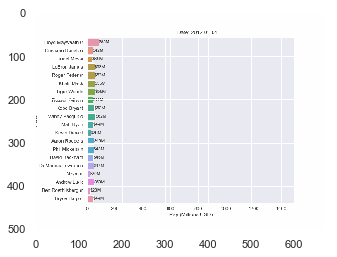